<a href="https://colab.research.google.com/github/jps0/python-fiap/blob/main/feature_engineering_projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício da Aula 4

O objetivo deste exercício é aplicar técnicas de Feature Engineering e análise de fairness em um cenário de análise de crédito. Os alunos trabalharão com um dataset realista de empréstimos bancários e serão desafiados a realizar as seguintes atividades:

- Análise Exploratória de Dados:
  - Distribuição das Variáveis Categóricas: Visualização da distribuição das variáveis categóricas, como gênero e status de emprego, usando gráficos de contagem.
  - Distribuição das Variáveis Numéricas: Análise das variáveis numéricas, como idade e renda, com histogramas e gráficos de densidade.
  - Boxplots: Criação de boxplots para variáveis numéricas para identificar outliers e entender a distribuição dos dados.
  - Matriz de Correlação: Visualização da correlação entre variáveis numéricas para entender as relações entre elas.
  - Análise da Variável de Destino: Análise da distribuição da variável de destino, que indica o status do empréstimo (Aprovado ou Rejeitado).

- Análise de Fairness:
  - Fairness por Gênero:
    - Distribuição por Gênero: Visualização da distribuição de empréstimos aprovados e rejeitados entre diferentes gêneros usando histogramas.
    - Cálculo do Disparate Impact Ratio (DIR) para Gênero: Cálculo da razão entre as taxas de aprovação de empréstimos para gêneros masculino e feminino para identificar possíveis vieses.
  - Fairness por Renda:
    - Distribuição por Renda: Análise da distribuição de empréstimos aprovados e rejeitados entre grupos de alta e baixa renda usando histogramas.
    - Cálculo do Disparate Impact Ratio (DIR) para Renda: Cálculo da razão entre as taxas de aprovação de empréstimos para clientes com renda alta e baixa para verificar possíveis disparidades.

- Pré-processamento e Seleção de Features:
  - Encoding das Variáveis Categóricas: Aplicação de técnicas de codificação, como Label Encoding, para variáveis categóricas.
  - Normalização: Aplicação de normalização nos dados para garantir que todas as variáveis numéricas estejam na mesma escala.
  - Seleção de Features: Utilização de métodos como Chi-Square para selecionar as variáveis mais relevantes para o modelo.

- Treinamento e Avaliação de Modelos:
  - Treinamento de Modelo: Treinamento de um modelo de regressão logística para prever o status de empréstimo com base nas features selecionadas.
  - Avaliação do Modelo: Avaliação do modelo usando métricas como acurácia, matriz de confusão e relatório de classificação para verificar o desempenho e a fairness do modelo.

- Documentação e Relatório:
  - Relatório: Documente todos os passos seguidos, as decisões tomadas e as descobertas realizadas. Inclua gráficos e tabelas relevantes para suportar suas conclusões. Discuta as implicações das análises de fairness e as transformações de features na análise final.

# Dataset "Empréstimos Bancários"

Este dataset contém informações detalhadas sobre clientes de um banco, incluindo dados demográficos, financeiros e de status de emprego. As informações fornecidas são ideais para a análise de crédito, perfis de clientes e podem ser utilizadas em diversas técnicas de feature engineering e análise exploratória.

- Principais Características do Dataset:
    - age: Idade do cliente (em anos).
    - gender: Gênero do cliente (Masculino ou Feminino).
    - income: Renda anual do cliente (em milhares de dólares).
    - education: Nível de escolaridade do cliente (Ensino Médio, Graduação, Mestrado, Doutorado).
    - marital_status: Estado civil do cliente (Solteiro, Casado, Divorciado, Viúvo).
    - credit_score: Pontuação de crédito do cliente (em uma escala de 300 a 850).
    - loan_amount: Valor do empréstimo solicitado (em milhares de dólares).
    - employment_status: Situação de emprego do cliente (Empregado, Desempregado, Autônomo, Aposentado).
    - dependents: Número de dependentes do cliente.
    - home_ownership: Situação de posse da casa (Própria, Alugada, Hipotecada).
    - loan_purpose: Propósito do empréstimo (Casa, Carro, Educação, Negócios, Pessoal).
    - loan_status: Status do empréstimo (Aprovado ou Rejeitado).

- Importância das Variáveis:
    - age: A idade pode influenciar a capacidade de pagamento e o perfil de risco do cliente. Clientes mais jovens podem ter menos histórico de crédito, enquanto clientes mais velhos podem ter maior estabilidade financeira.
    - gender: O gênero pode ser analisado para investigar potenciais vieses na concessão de crédito.
    - income: A renda anual é um fator determinante na análise de crédito, pois influencia diretamente a capacidade de pagamento do cliente.
    - education: O nível de escolaridade pode estar relacionado ao perfil financeiro e ao potencial de ganho do cliente, influenciando assim a análise de risco.
    - marital_status: O estado civil pode afetar a estabilidade financeira e a necessidade de empréstimos. Por exemplo, casais casados podem ter renda conjunta.
    - credit_score: A pontuação de crédito é uma métrica essencial para determinar o risco de inadimplência de um cliente.
    - loan_amount: O valor do empréstimo solicitado é crucial para avaliar o risco associado ao cliente e a viabilidade de pagamento.
    - employment_status: A situação de emprego pode impactar diretamente a estabilidade financeira do cliente e sua capacidade de honrar o empréstimo.
    - dependents: O número de dependentes pode influenciar a capacidade financeira do cliente, já que mais dependentes podem significar maiores despesas.
    - home_ownership: A posse de uma casa pode ser um indicador de estabilidade financeira e segurança no pagamento de empréstimos.
    - loan_purpose: O propósito do empréstimo ajuda a entender a necessidade do cliente e pode influenciar a decisão de aprovação.
    - loan_status: O status do empréstimo, se aprovado ou rejeitado, é a variável de destino que pode ser utilizada em modelos de classificação para prever a concessão de futuros empréstimos.

# 1 Importação das Bibliotecas Necessárias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, chi2

# 2 Carregar o dataset

In [ ]:
df = pd.read_csv('datasets/bank-loan-data.csv')
df.head()

,age,gender,income,education,marital_status,credit_score,loan_amount,employment_status,dependents,home_ownership,loan_purpose,loan_status
0,56,Male,22,PhD,Divorced,722,33,Self-Employed,5,Mortgage,Home,Approved
1,69,Female,38,Bachelor,Divorced,798,10,Unemployed,0,Mortgage,Home,Approved
2,46,Male,42,PhD,Single,590,22,Employed,1,Own,Education,Rejected
3,32,Female,123,PhD,Single,468,19,Unemployed,4,Mortgage,Business,Rejected
4,60,Male,124,PhD,Single,761,29,Unemployed,2,Mortgage,Personal,Rejected


## 2.1 Exploração Inicial dos Dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                10000 non-null  int64 
 1   gender             10000 non-null  object
 2   income             10000 non-null  int64 
 3   education          10000 non-null  object
 4   marital_status     10000 non-null  object
 5   credit_score       10000 non-null  int64 
 6   loan_amount        10000 non-null  int64 
 7   employment_status  10000 non-null  object
 8   dependents         10000 non-null  int64 
 9   home_ownership     10000 non-null  object
 10  loan_purpose       10000 non-null  object
 11  loan_status        10000 non-null  object
dtypes: int64(5), object(7)
memory usage: 937.6+ KB


In [ ]:
df.describe()

,age,income,credit_score,loan_amount,dependents
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,44.021700,84.705500,576.923000,25.407200,2.486900
std,15.203998,37.650765,158.514086,14.440832,1.711643
min,18.000000,20.000000,300.000000,1.000000,0.000000
25%,31.000000,52.000000,440.000000,13.000000,1.000000
50%,44.000000,85.000000,577.000000,25.000000,2.000000
75%,57.000000,117.000000,714.000000,38.000000,4.000000
max,70.000000,150.000000,850.000000,50.000000,5.000000


# 3 Análise de Fairness (Viés)

## 3.1 Distribuição por Gênero

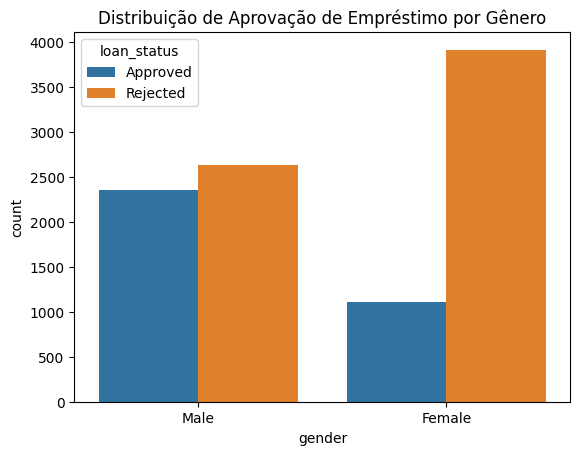

In [ ]:
sns.countplot(x='gender', hue='loan_status', data=df)
plt.title('Distribuição de Aprovação de Empréstimo por Gênero')
plt.show()

### 3.1.1

Disparate Impact Ratio (DIR): A DIR compara as taxas de aprovação entre dois grupos. Um DIR próximo de 1 indica que não há discriminação entre os grupos. Um valor menor que 0.8 pode indicar um potencial viés.

DIR_gender: A razão entre a taxa de aprovação das mulheres e a taxa de aprovação dos homens.

In [ ]:
# Considerando que a DIR é a razão entre as taxas de aprovação de dois grupos: Masculino e Feminino.
male_approved = df[(df['gender'] == 'Male') & (df['loan_status'] == 'Approved')].shape[0]
male_total = df[df['gender'] == 'Male'].shape[0]
male_rate = male_approved / male_total

female_approved = df[(df['gender'] == 'Female') & (df['loan_status'] == 'Approved')].shape[0]
female_total = df[df['gender'] == 'Female'].shape[0]
female_rate = female_approved / female_total

DIR_gender = female_rate / male_rate
print(f'Disparate Impact Ratio (DIR) para Gênero: {DIR_gender:.2f}')

Disparate Impact Ratio (DIR) para Gênero: 0.47


## 3.2 Distribuição por Idade

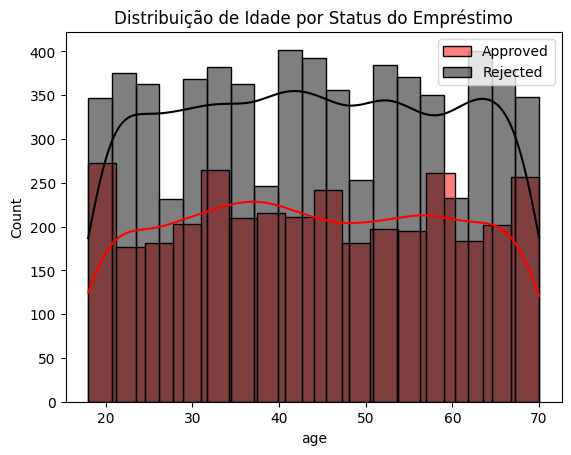

In [ ]:
sns.histplot(df[df['loan_status'] == 'Approved']['age'], color='red', kde=True, label='Approved')
sns.histplot(df[df['loan_status'] == 'Rejected']['age'], color='black', kde=True, label='Rejected')
plt.title('Distribuição de Idade por Status do Empréstimo')
plt.legend()
plt.show()

### 3.2.1 Cálculo da Métrica de Fairness - Disparate Impact Ratio (DIR)

No exemplo, estamos comparando jovens (<35 anos) e pessoas mais velhas (>=35 anos) para ver se há diferença significativa na taxa de aprovação de empréstimos entre esses grupos.

In [ ]:
# Considerando que a DIR é a razão entre as taxas de aprovação de dois grupos. Vamos comparar jovens (< 35 anos) e mais velhos (>= 35 anos).
young_approved = df[(df['age'] < 35) & (df['loan_status'] == 'Approved')].shape[0]
young_total = df[df['age'] < 35].shape[0]
young_rate = young_approved / young_total

old_approved = df[(df['age'] >= 35) & (df['loan_status'] == 'Approved')].shape[0]
old_total = df[df['age'] >= 35].shape[0]
old_rate = old_approved / old_total

DIR = young_rate / old_rate
print(f'Disparate Impact Ratio (DIR) para Idade: {DIR:.2f}')

Disparate Impact Ratio (DIR) para Idade: 1.01


## 3.3 Distribuição por Renda Anual

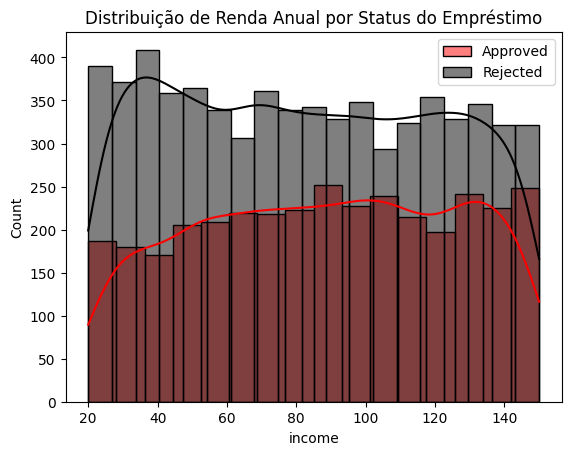

In [ ]:
sns.histplot(df[df['loan_status'] == 'Approved']['income'], color='red', kde=True, label='Approved')
sns.histplot(df[df['loan_status'] == 'Rejected']['income'], color='black', kde=True, label='Rejected')
plt.title('Distribuição de Renda Anual por Status do Empréstimo')
plt.legend()
plt.show()

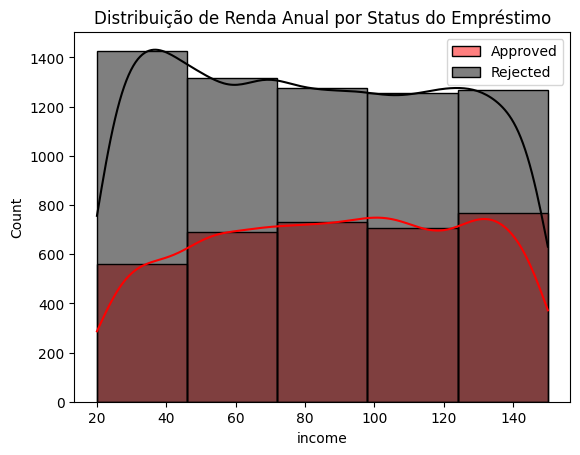

In [ ]:
# Ajustando a quantidade de bins para o histograma
bins = 5  # Você pode mudar esse valor para o número de bins que preferir

sns.histplot(df[df['loan_status'] == 'Approved']['income'], bins=bins, color='red', kde=True, label='Approved')
sns.histplot(df[df['loan_status'] == 'Rejected']['income'], bins=bins, color='black', kde=True, label='Rejected')
plt.title('Distribuição de Renda Anual por Status do Empréstimo')
plt.legend()
plt.show()

## 3.3.1 Cálculo da Métrica de Fairness - Disparate Impact Ratio (DIR) para Renda

In [ ]:
# Definindo a mediana da renda como ponto de corte entre 'Alta' e 'Baixa'
income_median = df['income'].median()

# Separando os grupos de renda alta e baixa
high_income_approved = df[(df['income'] >= income_median) & (df['loan_status'] == 'Approved')].shape[0]
high_income_total = df[df['income'] >= income_median].shape[0]
high_income_rate = high_income_approved / high_income_total

low_income_approved = df[(df['income'] < income_median) & (df['loan_status'] == 'Approved')].shape[0]
low_income_total = df[df['income'] < income_median].shape[0]
low_income_rate = low_income_approved / low_income_total

# Calculando o DIR para renda
DIR_income = low_income_rate / high_income_rate
print(f'Disparate Impact Ratio (DIR) para Renda: {DIR_income:.2f}')

Disparate Impact Ratio (DIR) para Renda: 0.88


# 4 Pré-processamento dos Dados

## 4.1 Tratamento de Variáveis Categóricas com Label Encoding

In [ ]:
# Copiando dataset
df_encoded = df.copy()

# Enconding variáveis categóricas
categorical_columns = ['gender', 'education', 'marital_status', 'employment_status', 'home_ownership', 'loan_purpose', 'loan_status']
le = LabelEncoder()
for col in categorical_columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [ ]:
df_encoded.head()

,age,gender,income,education,marital_status,credit_score,loan_amount,employment_status,dependents,home_ownership,loan_purpose,loan_status
0,56,1,22,3,0,722,33,2,5,0,3,0
1,69,0,38,0,0,798,10,3,0,0,3,0
2,46,1,42,3,2,590,22,0,1,1,2,1
3,32,0,123,3,2,468,19,3,4,0,0,1
4,60,1,124,3,2,761,29,3,2,0,4,1


## 4.2 Separação das Variáveis Independentes e Dependentes

In [ ]:
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

## 4.3 Padronização das Variáveis Numéricas

In [ ]:
# Copiando dataset
X_scaled = X.copy()
scaler = StandardScaler()
X_scaled[['age', 'income', 'credit_score', 'loan_amount', 'dependents']] = scaler.fit_transform(X_scaled[['age', 'income', 'credit_score', 'loan_amount', 'dependents']])

In [ ]:
X_scaled.head()

,age,gender,income,education,marital_status,credit_score,loan_amount,employment_status,dependents,home_ownership,loan_purpose
0,0.787878,1,-1.665534,3,0,0.915277,0.525813,2,1.468312,0,3
1,1.642959,0,-1.240555,0,0,1.394753,-1.066972,3,-1.453004,0,3
2,0.130124,1,-1.134310,3,2,0.082502,-0.235954,0,-0.868741,1,2
3,-0.790733,0,1.017148,3,2,-0.687185,-0.443709,3,0.884049,0,0
4,1.050980,1,1.043710,3,2,1.161324,0.248807,3,-0.284478,0,4


# 5 Seleção de Features

## 5.1 Seleção usando Chi-Square

In [ ]:
chi2_selector = SelectKBest(chi2, k=5)
X_kbest = chi2_selector.fit_transform(X, y)
selected_features = X.columns[chi2_selector.get_support()]
print("Selected Features: ", selected_features)

Selected Features:  Index(['gender', 'income', 'marital_status', 'credit_score', 'loan_amount'], dtype='object')


In [ ]:
# Calculando os valores do chi-quadrado e os p-valores
chi2_scores = chi2_selector.scores_
chi2_pvalues = chi2_selector.pvalues_

# Criando um DataFrame para exibir os resultados de forma organizada
chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_scores,
    'p-Value': chi2_pvalues
})

# Ordenando o DataFrame com base no score chi-quadrado
chi2_results_sorted = chi2_results.sort_values(by='Chi2 Score', ascending=False)

# Exibindo os resultados
print("\nChi2 Scores for all features:\n", chi2_results_sorted)


Chi2 Scores for all features:
               Feature    Chi2 Score        p-Value
5        credit_score  20330.254956   0.000000e+00
2              income    593.426732  4.503500e-131
1              gender    351.787361   1.729495e-78
6         loan_amount     23.496602   1.251346e-06
4      marital_status      6.296443   1.209805e-02
9      home_ownership      3.332676   6.791629e-02
8          dependents      2.613799   1.059377e-01
7   employment_status      1.603967   2.053420e-01
0                 age      1.352835   2.447831e-01
3           education      0.330933   5.651101e-01
10       loan_purpose      0.251812   6.158023e-01


# 6 Treinamento de um Modelo de Machine Learning

## 6.1 Treinamento de um Modelo de Machine Learning - Dados brutos

In [ ]:
X_raw_train, X_raw_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model_raw = LogisticRegression()
model_raw.fit(X_raw_train, y_train)
y_pred_raw = model_raw.predict(X_raw_test)

c:\Users\filip\GitHub\FIAP-Feature-Engineering\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 6.2 Avaliação do Modelo com Dados brutos

Accuracy: 0.6486666666666666


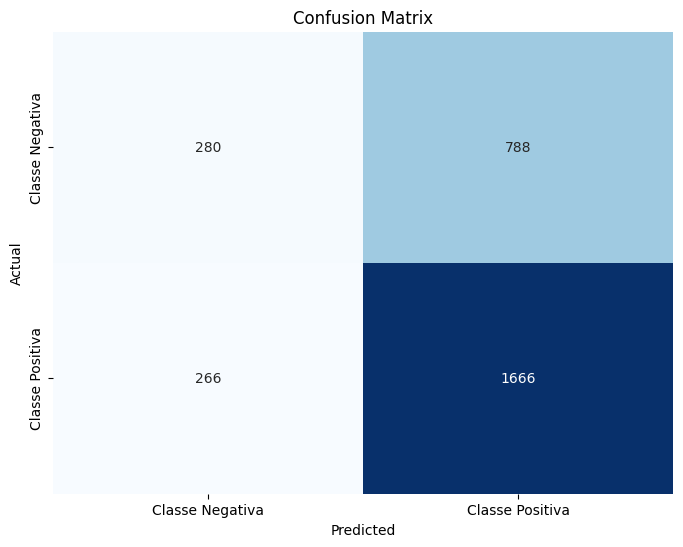

In [ ]:
# Supondo que y são os valores reais e y_pred_raw são as previsões do modelo
accuracy = accuracy_score(y_test, y_pred_raw)
conf_matrix = confusion_matrix(y_test, y_pred_raw)

# Exibindo a acurácia
print("Accuracy:", accuracy)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe Negativa', 'Classe Positiva'],
            yticklabels=['Classe Negativa', 'Classe Positiva'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 6.3 Treinamento de um Modelo de Machine Learning - Dados tratados

In [ ]:
X_kbest_train, X_kbest_test, y_train, y_test = train_test_split(X_kbest, y, test_size=0.3, random_state=42)
model_kbest = LogisticRegression()
model_kbest.fit(X_kbest_train, y_train)
y_pred_kbest = model_kbest.predict(X_kbest_test)

## 6.4 Avaliação do Modelo com Dados tratados

Accuracy: 0.6486666666666666


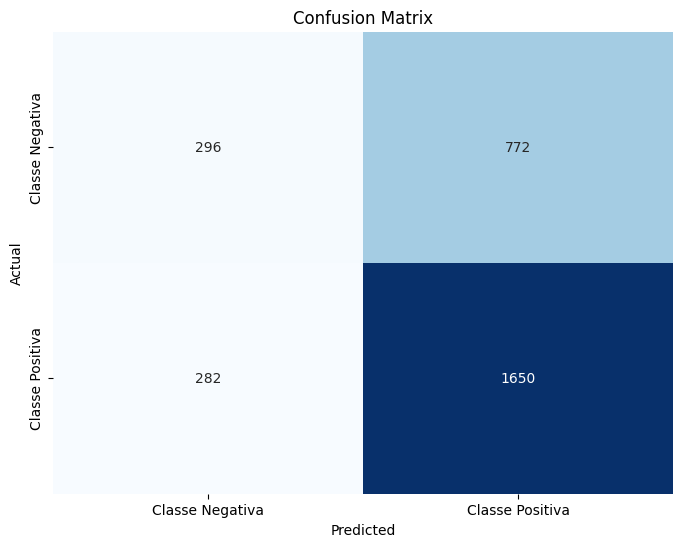

In [ ]:
# Supondo que y são os valores reais e y_pred_kbest são as previsões do modelo
accuracy = accuracy_score(y_test, y_pred_kbest)
conf_matrix = confusion_matrix(y_test, y_pred_kbest)

# Exibindo a acurácia
print("Accuracy:", accuracy)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe Negativa', 'Classe Positiva'],
            yticklabels=['Classe Negativa', 'Classe Positiva'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



```
# Isto está formatado como código
```

# Nova base

Este dataset contém informações detalhadas sobre clientes de um banco, incluindo dados demográficos, financeiros e de status de emprego. As informações fornecidas são ideais para a análise de crédito, perfis de clientes e podem ser utilizadas em diversas técnicas de feature engineering e análise exploratória.

Principais Características do Dataset:
id: código interno de uma pessoa cliente do banco
idade: Idade do cliente (em anos).
sexo: Gênero do cliente (Masculino ou Feminino).
estado_civil: Estado civil do cliente (Solteiro, Casado, Divorciado).
escola: Nível de escolaridade do cliente (Ensino Fundamental, Médio, Graduação, Doutorado)
Qte_dependentes: Número de dependentes do cliente.
tempo_ultimoservico: Tempo de trabalho (em meses)
trabalha: Situação de emprego do cliente (Não = 0, Sim = 1).
vl_salario_mil: salario (em milhares).
reg_moradia: região da moradia: (1 = Segmento geográfico A, 2 = Segmento geográfico B, 3 = Segmento geográfico C, 4 = Segmento geográfico D, 5 = Segmento geográfico E, 6 = Segmento geográfico F)
casa_propria = casa própria (0 = Não, 1 = Sim)
vl_imovel_em_mil: valor do imóvel (em reais)
Qtde_cartoes: Quantidade de Cartões de Crédito
Qte_carros: Quantidade de carros
Score_credito: Credit Scoring

In [2]:
import pandas as pd


In [6]:
df_score = pd.read_csv('/content/Base_ScoreCredito_QuantumFinance.csv',sep = ';')
df_score.head()

,id,idade,sexo,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
0,708082083,45,F,casado,graduacao,3,40,1,"40,089665024322",3,0,0,1,1,778
1,708083283,58,M,solteiro,ensino fundam,0,44,1,"66,557645274838",3,0,0,1,0,"276,3"
2,708084558,46,M,divorciado,doutorado,3,35,1,"123,68182089138",6,0,0,1,1,401
3,708085458,34,F,solteiro,mestrado,0,22,1,"19,7159343168329",6,0,0,1,0,"347,4"
4,708086958,49,F,casado,mestrado,2,36,0,0,3,1,437,1,2,476


In [7]:
df_score.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   10127 non-null  int64 
 1   idade                10127 non-null  int64 
 2   sexo                 10127 non-null  object
 3   estado_civil         10127 non-null  object
 4   escola               10127 non-null  object
 5   Qte_dependentes      10127 non-null  int64 
 6   tempo_ultimoservico  10127 non-null  int64 
 7   trabalha             10127 non-null  int64 
 8   vl_salario_mil       10127 non-null  object
 9   reg_moradia          10127 non-null  int64 
 10  casa_propria         10127 non-null  int64 
 11  vl_imovel_em_mil     10127 non-null  int64 
 12  Qte_cartoes          10127 non-null  int64 
 13  Qte_carros           10127 non-null  int64 
 14  SCORE_CREDITO        10127 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.2+ MB


In [8]:
df_score.describe()

,id,idade,Qte_dependentes,tempo_ultimoservico,trabalha,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,1.547447,34.133208,0.911919,3.783450,0.352424,208.999111,1.083638,0.623383
std,3.690378e+07,8.016814,1.489079,8.221428,0.283427,1.580486,0.477749,378.495229,0.333784,0.569796
min,7.080821e+08,26.000000,0.000000,7.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.130368e+08,41.000000,0.000000,30.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000
50%,7.179264e+08,46.000000,1.000000,34.000000,1.000000,4.000000,0.000000,0.000000,1.000000,1.000000
75%,7.731435e+08,52.000000,3.000000,39.000000,1.000000,5.000000,1.000000,289.000000,1.000000,1.000000
max,8.283431e+08,73.000000,5.000000,57.000000,1.000000,6.000000,1.000000,1800.000000,4.000000,2.000000
